In [5]:
import csv
import subprocess
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
class Experiment:
    def __init__(self, parameters_file):
        self.parameters_file = parameters_file
        self.parameters=[]
        self.list_function_id=[]
        self.list_name=[]
        self.list_range_low=[]
        self.list_range_high=[]
        self.list_dimensions_vector=[]
        self.readParameters()
        self.solution_file = 'solutions.csv'
        self.solution_df = None
        
    def readParameters(self):
        with open(self.parameters_file) as csvfile:
            read_csv = csv.reader(csvfile, delimiter=',')
            for row in read_csv:
                self.parameters.append(row)
        
        #decode the parameters
        for i in range(1,len(self.parameters)):
            self.list_function_id.append(self.parameters[i][0]) #function_id
            self.list_name.append(self.parameters[i][1]) # function name
            self.list_range_low.append(self.parameters[i][2]) # range low
            self.list_range_high.append(self.parameters[i][3]) # range high
            self.list_dimensions_vector.append(self.parameters[i][4:]) # dimension vector, from 4 to the last element
            
    def delete_all_output_files(self):
        files = glob.glob('f*.csv')
        for f in files:
            os.remove(f)
            
    def merge_all_output_files(self):
        files = glob.glob("./f*.csv")
        #print(files)
        solutions=[]
        for f in files:
            with open(f) as csvfile:
                read_csv = csv.reader(csvfile, delimiter=',')
                for row in read_csv:
                    solutions.append(row)
        #print(solutions)
        
        
        with open(self.solution_file, mode='w') as solution_file:
            writer = csv.writer(solution_file, delimiter=',', lineterminator='\n',quotechar='"', quoting=csv.QUOTE_MINIMAL)
            writer.writerow(['function_id'
                             ,'n_samples'
                             ,'dimensions'
                             ,'range_low'
                             ,'range_high'
                             ,'mean'
                             ,'std_dev'
                             ,'range'
                             ,'median'
                             ,'time_ms'
                             ,'range_min'
                             ,'range_max'
                            ])
            writer.writerows(solutions)
            
    def plot(self):
        df=pd.read_csv('solutions.csv',index_col=False)
        df.sort_values(by=['dimensions', 'function_id'], inplace = True)
        self.solution_df = df
        
        #-----------plot running time
        fig, ax = plt.subplots(figsize=(8,6))
        for label, data in df.groupby('dimensions'):
            data.plot(kind='line',x='function_id',y='time_ms',ax=ax, style='o--', xticks=data['function_id'], label='dimension: %d'%label)
        plt.ylabel('time [ms]')    
        plt.legend()
        plt.grid()
        plt.title('Running time')
        
        #---------plot statistics
        for id, data in df.groupby('function_id'):
            fig, ax = plt.subplots(figsize=(8,4))
            plt.errorbar(data['dimensions'],data['mean'],yerr=data['std_dev'],fmt='o:', markersize=3, capsize=5, label='mean and std_dev')
            plt.plot(data['dimensions'],data['median'],label='median')
            plt.fill_between(data['dimensions'], data['range_min'], data['range_max'], color='gray', alpha=0.2, label='range')
            plt.xticks(data['dimensions'])
            plt.title("f%d : %s"%(id,test.list_name[id-1]))
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            plt.xlabel('dimensions')
            plt.ylabel('solution')
            plt.grid()
        

    def run(self, n_samples):
        
        process_list = []
        for i in range(len(self.list_function_id)): # run each function
            for dimension in self.list_dimensions_vector[i]: # run different dimensions of each function
                #subprocess.Popen() can be multi process, subprocess.run() need to wait one process to finish
                process = subprocess.Popen([
                                "../bin/debug/project.exe"
                                #"../bin/release/project1.o"
                                ,self.list_function_id[i] #function_id
                                ,str(n_samples)
                                ,str(dimension)
                                ,self.list_range_low[i]
                                ,self.list_range_high[i]
                               ])
                process_list.append(process)
        
        # wait every process to finish
        for p in process_list:
            p.wait()
        print("----finished----")
        
        self.merge_all_output_files()
        #delete all temp files
        self.delete_all_output_files()

In [7]:
test = Experiment('../config/experiments.txt') 

In [8]:
test.run(100000) # n random samples

----finished----


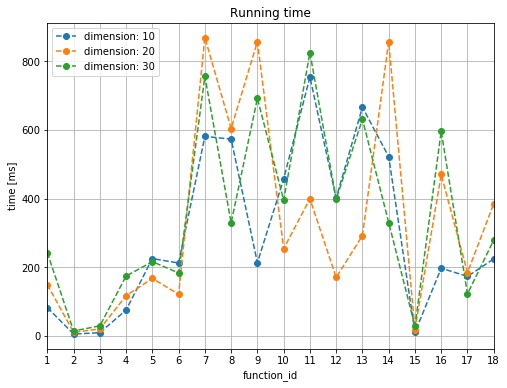

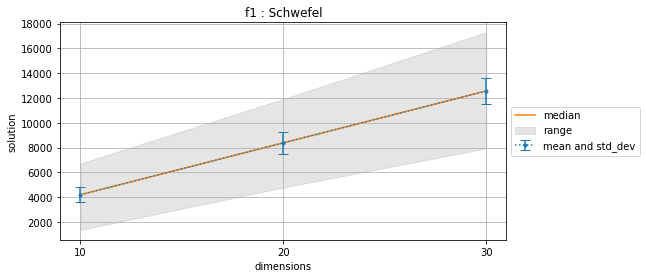

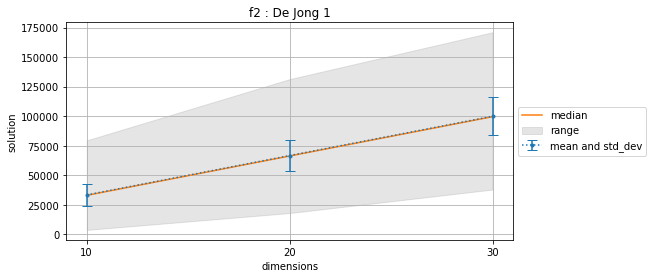

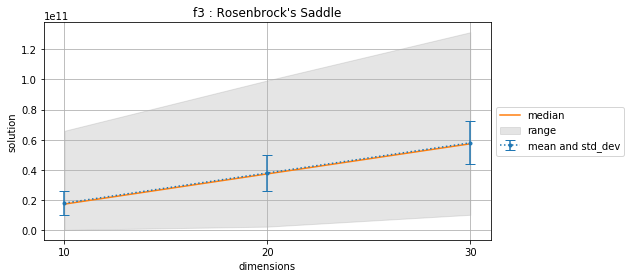

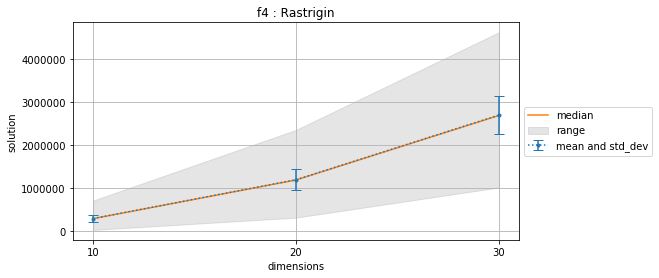

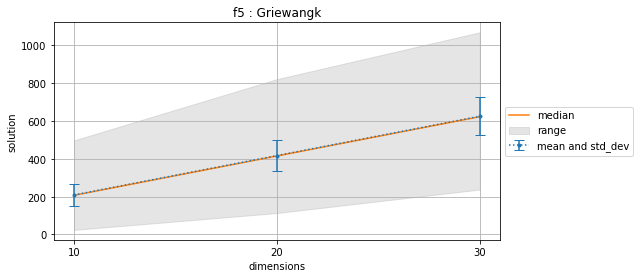

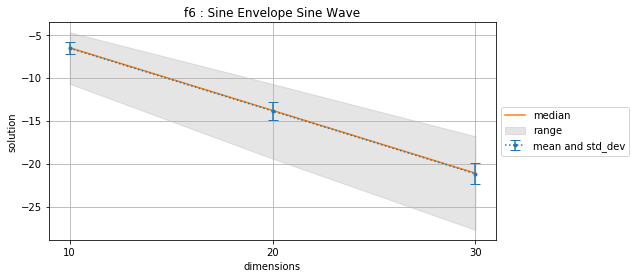

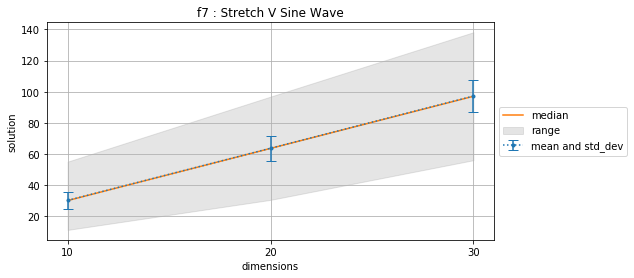

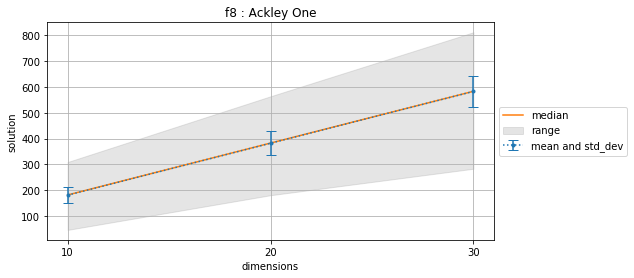

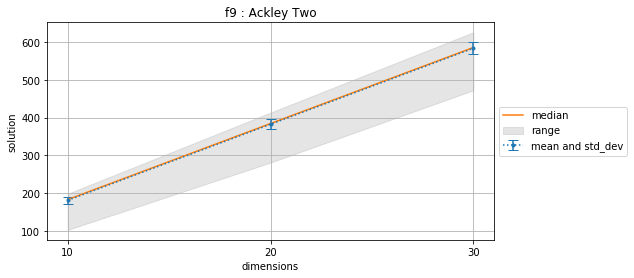

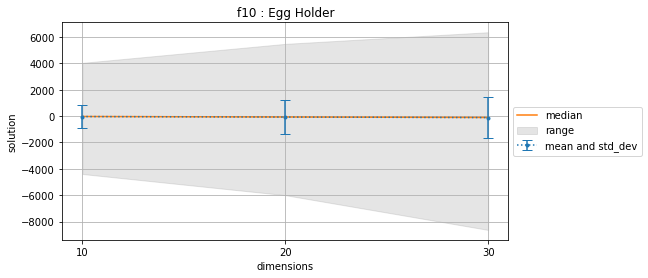

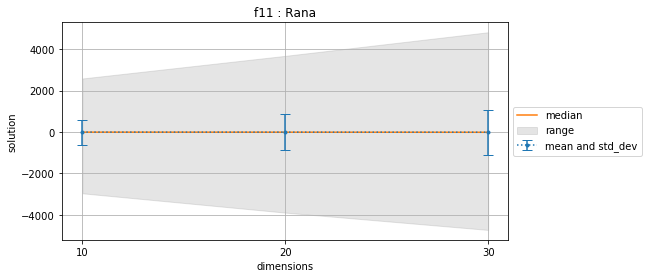

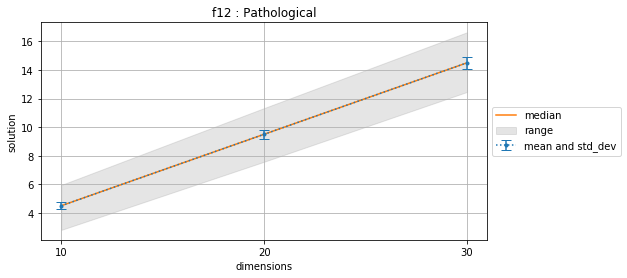

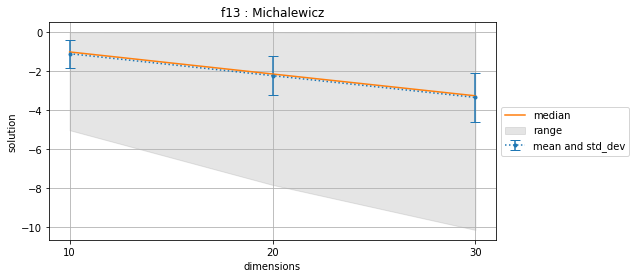

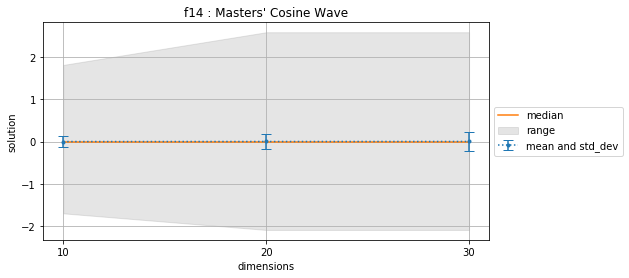

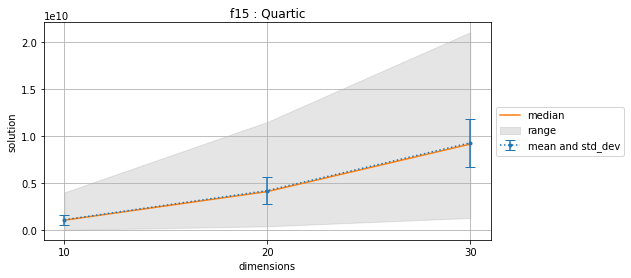

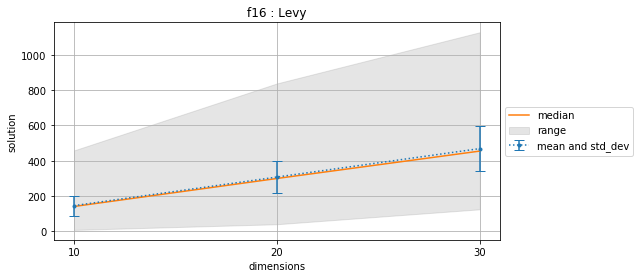

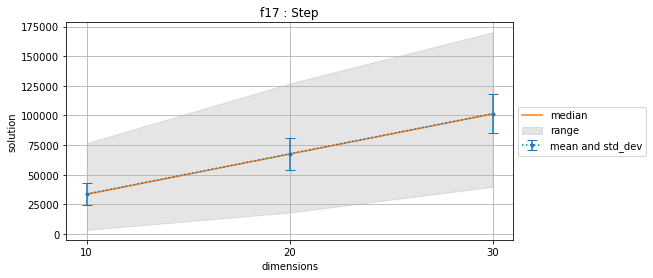

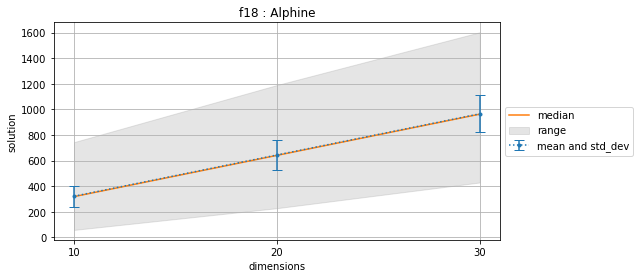

In [9]:
test.plot()

In [10]:
test.solution_df

,function_id,n_samples,dimensions,range_low,range_high,mean,std_dev,range,median,time_ms,range_min,range_max
27,1,100000,10,-512,512.00000,4.187050e+03,6.147720e+02,5.362430e+03,4.188730e+03,82,1.349010e+03,6.711440e+03
30,2,100000,10,-100,100.00000,3.331210e+04,9.407350e+03,7.583440e+04,3.296640e+04,5,3.696730e+03,7.953110e+04
33,3,100000,10,-100,100.00000,1.799600e+10,7.991640e+09,6.569510e+10,1.734720e+10,9,2.407340e+08,6.593580e+10
36,4,100000,10,-30,30.00000,2.998110e+05,8.469140e+04,6.811170e+05,2.967050e+05,75,3.555420e+04,7.166710e+05
39,5,100000,10,-500,500.00000,2.092010e+02,5.879620e+01,4.739660e+02,2.070380e+02,225,2.410320e+01,4.980700e+02
42,6,100000,10,-30,30.00000,-6.575150e+00,6.889320e-01,5.995780e+00,-6.510320e+00,212,-1.071340e+01,-4.717590e+00
45,7,100000,10,-30,30.00000,3.017360e+01,5.553590e+00,4.386060e+01,3.005650e+01,581,1.120650e+01,5.506710e+01
48,8,100000,10,-32,32.00000,1.808700e+02,3.206020e+01,2.627490e+02,1.816670e+02,573,4.641680e+01,3.091650e+02
51,9,100000,10,-32,32.00000,1.810490e+02,9.069390e+00,9.552090e+01,1.830300e+02,213,1.028620e+02,1.983830e+02
0,10,100000,10,-500,500.00000,-3.274090e+01,8.743190e+02,8.436810e+03,-2.760220e+01,457,-4.393190e+03,4.043620e+03
